In [1]:
%matplotlib inline

In [2]:
from imutils.object_detection import non_max_suppression
import numpy as np
import argparse
import time
import cv2


from matplotlib import pyplot as plt

In [3]:
ret, thresh1 = cv2.threshold(im1,180,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
dilated = cv2.dilate(thresh1,kernel,iterations = 2)
_, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cordinates = []
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cordinates.append((x,y,w,h))
    #bound the images
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1)

cv2.namedWindow('BindingBox', cv2.WINDOW_NORMAL)
cv2.imwrite('data/BindingBox4.jpg',im)

NameError: name 'im1' is not defined

In [388]:
# load the input image and grab the image dimensions
image = cv2.imread("./test_data/IMAG0030.jpg")
orig = image.copy()
(H, W) = image.shape[:2]

print(H, W)

2592 1728


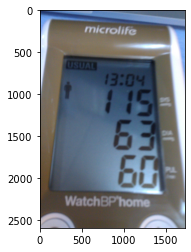

In [389]:
plt.imshow(orig)
plt.show()

In [82]:
# Make the new width 4032 by 3072 which are both divisible by 32
image = cv2.resize(image, (3072, H))
(H, W) = image.shape[:2]

In [83]:
print(H, W)

250 3072


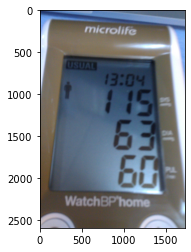

In [390]:
plt.imshow(image)
plt.show()

In [5]:
# 2 layers
# - 1. output probabilities of whether the image contains text or not
# - 2. the bounding box geometry when text is found
layerNames = [
	"feature_fusion/Conv_7/Sigmoid",
	"feature_fusion/concat_3"]

In [15]:
# load the pre-trained EAST text detector
print("[INFO] loading EAST text detector...")
net = cv2.dnn.readNet("./OpenCVModel/frozen_east_text_detection.pb")

[INFO] loading EAST text detector...


In [88]:
import pytesseract

In [114]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/Cellar/tesseract/4.1.1/bin/tesseract'
pytesseract.image_to_string(image)

'i\n\nra\n\nI\nmia\nLit\nI\ne\n\x0c'

In [45]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    #return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return cv2.threshold(image,180,255,cv2.THRESH_BINARY_INV)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    #return cv2.dilate(image, kernel, iterations = 1)
    return cv2.dilate(image, kernel, iterations = 2)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


In [115]:
# Preprocess?
gray = get_grayscale(image)
dilate1 = dilate(gray)
thresh = thresholding(gray)
#open1 = opening(thresh)
#canny1 = canny(open1)

#deskew1 = deskew(open1)

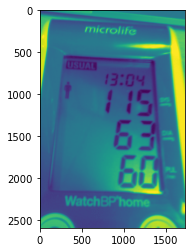

In [193]:
plt.imshow(gray)
#plt.imshow(thresh)
plt.show()

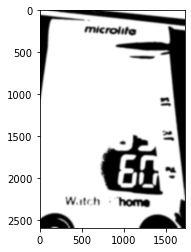

i 0 400 1648 2592 0
( 731 398 1460 1103 0
- 1500 593 1616 725 0
W 316 282 350 354 0
a 352 281 409 365 0
t 482 283 540 353 0
c 570 301 573 316 0
h 647 284 707 357 0
h 943 251 1050 364 0
o 979 251 1121 364 0
r 943 251 1308 364 0
e 1150 251 1308 364 0
— 0 0 403 175 0
‘ 1124 0 1352 341 0
a 1185 0 1641 159 0
* 1605 0 1721 337 0



In [391]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray2 = cv2.equalizeHist(gray)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
blur = cv2.GaussianBlur(thresh, (53,53), 0)
dila = cv2.dilate(blur, None, iterations=2)
#cnts = cv2.findContours(
#                blur.copy(), cv2.RETR_EXTERNAL,
#                cv2.CHAIN_APPROX_SIMPLE)
edgy = cv2.edgePreservingFilter(blur, flags=cv2.RECURS_FILTER, sigma_s=20, sigma_r=0.01)

#NORMCONV_FILTER
#RECURS_FILTER
#sigma_s	Range between 0 to 200.
#sigma_r	Range between 0 to 1.


plt.imshow(blur, cmap="gray")
plt.show()

boxes = pytesseract.image_to_boxes(dila, config='--psm 6')
print(boxes)

In [392]:
image = cv2.imread('./test_data/IMAG0030.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,55, 255, cv2.THRESH_BINARY_INV)[1]
thresh = 255 - thresh

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
result = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)

cv2.imshow('thresh', thresh)
cv2.imshow('result', result)
#cv2.imwrite('./bw_result.jpg', result)

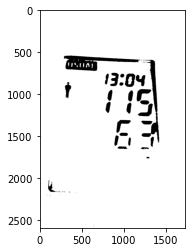

In [393]:
plt.imshow(result)
plt.show()

In [394]:
boxes = pytesseract.image_to_boxes(result, 
                                  # config='--psm 11 --oem 3 -c tessedit_char_whitelist=123456789'
                                   config='--psm 11 --oem 3'
                                  )
print(boxes)

1 774 1707 821 1837 0
3 836 1688 938 1846 0
: 946 1692 1006 1834 0
O 1013 1678 1136 1838 0
Y 1141 1685 1257 1821 0
( 1032 1360 1089 1490 0
J 1168 1329 1344 1480 0
( 1050 1506 1110 1636 0
i 1152 1506 1326 1653 0
y 887 976 939 1102 0
t 1050 974 1083 1080 0
e 945 940 1040 971 0
a 971 931 1023 975 0
. 1004 931 1041 975 0
D 1202 935 1246 962 0
e 1202 935 1301 962 0
m 1249 935 1286 962 0
o 1300 935 1305 937 0



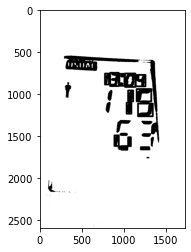

In [395]:
img1 = result.copy()
(h, w) = img1.shape[:2]
for b in boxes.splitlines():
    #print(b)
    b = b.split(' ')
    img1 = cv2.rectangle(img1, 
                        (int(b[1]), h - int(b[2])), 
                        (int(b[3]), h - int(b[4])), 
                        (0, 255, 255), 
                        20 # Pixel border
                       )

plt.imshow(img1, cmap="gray")
plt.show()

## Deskew the Image

3.0167597765363183


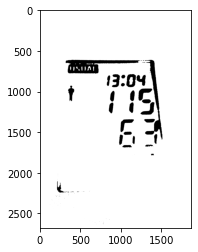

In [396]:
import math
from typing import Tuple, Union

import cv2
import numpy as np

from deskew import determine_skew


def rotate(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]
) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)

img2 = result.copy()
angle = determine_skew(img2)
print(angle)
rotated = rotate(img2, angle, (255, 255, 255))
plt.imshow(rotated, cmap="gray")
plt.show()

In [397]:
boxes = pytesseract.image_to_boxes(rotated, 
                                  # config='--psm 11 --oem 3 -c tessedit_char_whitelist=123456789'
                                   config='--psm 11 --oem 3'
                                  )
print(boxes)

1 818 1746 860 1876 0
3 882 1730 978 1890 0
: 991 1740 1046 1883 0
0 1058 1731 1176 1892 0
4 1181 1747 1351 1911 0
( 1104 1532 1374 1715 0
( 843 1408 900 1541 0
( 1093 1414 1147 1544 0
J 1232 1393 1401 1582 0
= 1275 1296 1407 1341 0
v 969 1021 1017 1148 0
t 1132 1029 1163 1135 0
c 1287 998 1329 1025 0
i 1287 998 1385 1025 0
m 1339 998 1367 1025 0
a 1353 998 1381 1025 0
! 1374 998 1385 1025 0
f 1397 1031 1436 1154 0



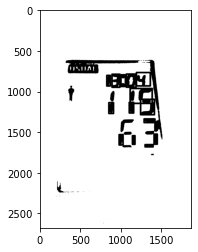

In [398]:
img2 = rotated.copy()
(h, w) = img2.shape[:2]
for b in boxes.splitlines():
    #print(b)
    b = b.split(' ')
    img2 = cv2.rectangle(img2, 
                        (int(b[1]), h - int(b[2])), 
                        (int(b[3]), h - int(b[4])), 
                        (0, 255, 255), 
                        20 # Pixel border
                       )

#cv2.imshow('img', img)
plt.imshow(img2, cmap="gray")
plt.show()

{'level': [1, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1], 'left': [0, 0, 0, 0, 0], 'top': [0, 0, 0, 0, 0], 'width': [3024, 3024, 3024, 3024, 3024], 'height': [4032, 4013, 4013, 4013, 4013], 'conf': ['-1', '-1', '-1', '-1', 95], 'text': ['', '', '', '', '']}


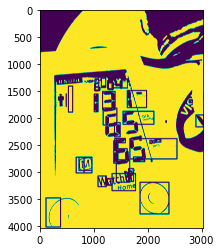

In [334]:
from pytesseract import Output

d = pytesseract.image_to_data(result, output_type=Output.DICT)
print(d)
img2 = result.copy()
(h, w) = img2.shape[:2]
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    img2 = cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img1)
plt.show()    

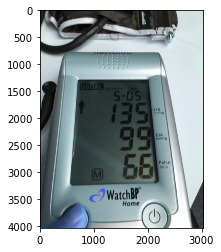

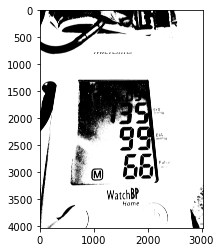

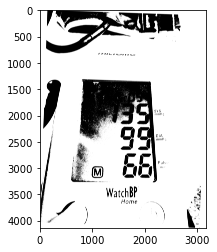

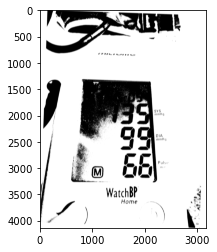

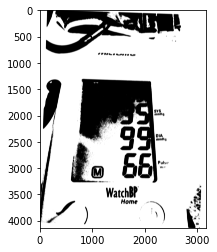

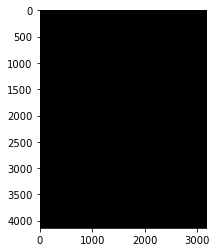

— 1427 3260 1481 3313 0
t 1440 3274 1554 3307 0
h 1550 3264 1648 3307 0
i 1603 3264 1693 3307 0
n 1648 3264 1737 3307 0
” 1705 3264 1807 3298 0
| 1776 3260 1812 3313 0
J 57 1883 405 2818 0
I 2332 1215 2348 1268 0
n 2356 1212 2390 1249 0
e 2398 1215 2433 1249 0
b 1559 945 1843 1421 0
b 1855 944 2133 1417 0
W 1251 579 1396 764 0
a 1289 576 1457 795 0
t 1392 578 1468 707 0
c 1479 576 1528 721 0
h 1533 576 1681 761 0
B 1625 576 1751 795 0
P 1692 576 1848 795 0



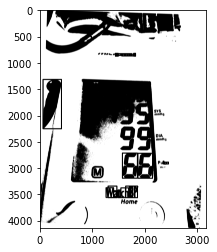

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [466]:
import lhl_image_transform as lhl
import importlib
importlib.reload(lhl)

image = cv2.imread("./test_data/IMG_5822.JPG")
lhl.plot_image(image)
image1 = lhl.img_process(image)
lhl.plot_image(image1)
image2 = lhl.img_rotate(image1)
lhl.plot_image(image2)

blur = cv2.GaussianBlur(image2, (33,33), 0)
#blur = cv2.medianBlur(image1, 55)


# Specify the kernel size. 
# The greater the size, the more the motion. 
kernel_size = 50
  
# Create the vertical kernel. 
kernel_v = np.zeros((kernel_size, kernel_size)) 
  
# Create a copy of the same for creating the horizontal kernel. 
kernel_h = np.copy(kernel_v) 
  
# Fill the middle row with ones. 
kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size) 
kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size) 
  
# Normalize. 
kernel_v /= kernel_size 
kernel_h /= kernel_size 
  
# Apply the vertical kernel. 
verticle_blur = cv2.filter2D(image1, -1, kernel_v) 
  
# Apply the horizontal kernel. 
horizonal_blur = cv2.filter2D(image1, -1, kernel_h) 

lhl.plot_image(blur)

gamma = 255 * (blur/255)**5
lhl.plot_image(gamma)

edges = cv2.Canny(blur.copy(),200,255)
edges = (edges - 255)
lhl.plot_image(edges)

new_p = Image.fromarray(gamma.copy())
new_p = new_p.convert("L")


boxes = lhl.compute_bounding(new_p)
lhl.plot_boxes(gamma, boxes)

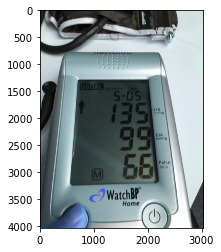

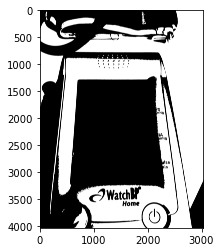

971 4030 2 2
961 3993 2 3
936 3987 3 2
691 3809 5 2
417 3712 2 3
673 3444 2 2
676 3432 7 7
392 3424 2 3
668 3422 3 2
357 3409 3 2
365 3408 2 2
674 3404 7 4
680 3379 2 4
672 3379 2 2
715 3353 4 2
730 3347 2 3
537 3327 2 3
830 3306 2 3
839 3300 2 2
809 3288 3 2
332 3287 2 2
817 3285 2 3
857 3283 2 2
900 3279 6 3
920 3278 2 4
884 3272 6 9
891 3270 7 6
886 3269 3 2
1000 3268 2 2
887 3264 2 3
997 3262 2 2
1003 3260 2 3
328 3260 2 4
1304 3238 2 3
2289 3147 5 2
331 2972 3 2
335 2863 6 8
2181 2386 2 3
2152 2030 2 3
2449 2000 3 3
2441 1952 2 4
2143 1931 4 4
2419 1873 3 2
2417 1861 3 2
2408 1815 3 2
19 1759 2 4
2130 1752 2 3
2369 1669 3 3
2344 1564 2 3
2306 1442 4 4
2298 1411 2 2
2292 1383 3 2
2274 1382 5 11
2282 1341 3 6
2139 1295 8 7
2261 1253 3 2
2198 904 2 3
2195 893 2 4
985 891 2 3
2102 576 3 2
644 456 6 6
963 446 350 80
2140 345 11 42
276 277 9 7
107 131 33 61
187 122 102 152
645 0 2119 3680


In [491]:
import lhl_image_transform as lhl
import importlib
import imutils
importlib.reload(lhl)

image = cv2.imread("./test_data/IMG_5822.JPG")
lhl.plot_image(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)[1]
lhl.plot_image(thresh)


cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
#print(cnts)

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    if len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        print(x, y, w, h)

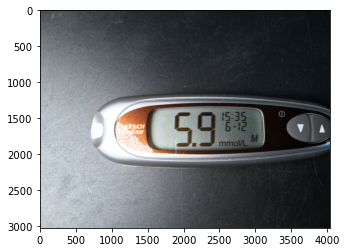

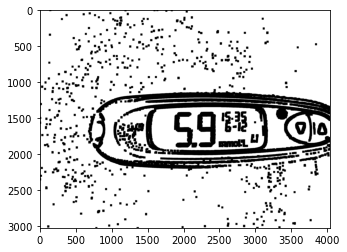

In [536]:
import lhl_image_transform as lhl
import importlib
import imutils
importlib.reload(lhl)

#image = cv2.imread("./test_data/IMG_5822.JPG")
#image = cv2.imread("./test_data/IMAG0030.jpg")
#image = cv2.imread("./test_data/IMG_5794.JPG")
image = cv2.imread("./test_data/IMG_8733.JPG")
lhl.plot_image(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 
                               91, 2)

kernel = np.ones((10,10),np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel) 

erode = cv2.erode(closing,kernel,iterations = 2)

thresh2 = cv2.threshold(erode, 100, 255, cv2.THRESH_BINARY)[1]

lhl.plot_image(thresh2)

a 605 2950 619 2979 0
g 609 2946 619 2996 0
( 643 2946 660 2996 0
« 655 2946 664 2996 0
= 659 2946 669 2996 0
a 1578 3007 1646 3024 0
z 1754 2999 1771 3024 0
k 1759 2993 1771 3024 0
& 1764 2993 1776 3024 0
= 1819 3006 1847 3024 0
a 863 2868 895 2896 0
s 1015 2857 1090 2910 0
w 1109 2861 1147 2895 0
a 1428 2885 1512 2915 0
s 1890 2853 1927 2894 0
, 1912 2835 1984 2941 0
! 1993 2874 2023 2930 0
" 2097 2904 2116 2937 0
a 1059 2806 1090 2841 0
f 1096 2798 1138 2856 0
= 1206 2806 1235 2838 0
g 1286 2794 1297 2860 0
s 1291 2794 1303 2860 0
o 1538 2707 1566 2735 0
o 1568 2717 1600 2751 0
B 1638 2727 1671 2760 0
® 1687 2738 1716 2766 0
o 2027 2770 2056 2801 0
o 2035 2750 2087 2812 0
” 2057 2750 2127 2812 0
a 1596 2618 1650 2657 0
e 1675 2631 1711 2664 0
| 1789 2645 1817 2673 0
a 750 2510 781 2541 0
n 804 2494 834 2525 0
= 892 2515 926 2543 0
4 981 2494 1010 2546 0
a 1240 2502 1270 2533 0
a 1338 2490 1367 2520 0
n 1461 2494 1481 2552 0
o 1465 2504 1496 2532 0
” 1498 2517 1526 2548 0
= 2198 2559

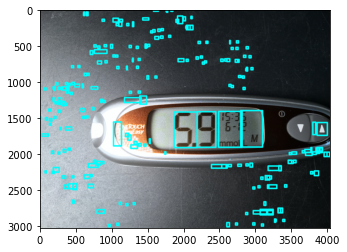

array([[[ 77,  79,  79],
        [ 77,  79,  79],
        [ 77,  79,  79],
        ...,
        [ 11,  14,  18],
        [ 11,  14,  18],
        [ 13,  16,  20]],

       [[ 77,  79,  79],
        [ 76,  78,  78],
        [ 76,  78,  78],
        ...,
        [ 12,  15,  19],
        [ 12,  15,  19],
        [ 14,  17,  21]],

       [[ 76,  78,  78],
        [ 75,  77,  77],
        [ 74,  76,  76],
        ...,
        [ 13,  16,  20],
        [ 13,  16,  20],
        [ 13,  16,  20]],

       ...,

       [[187, 192, 193],
        [194, 199, 200],
        [196, 201, 202],
        ...,
        [ 13,  15,  15],
        [ 13,  15,  15],
        [ 13,  15,  15]],

       [[186, 191, 192],
        [196, 201, 202],
        [197, 202, 203],
        ...,
        [ 13,  15,  15],
        [ 12,  14,  14],
        [ 11,  13,  13]],

       [[179, 184, 185],
        [192, 197, 198],
        [196, 201, 202],
        ...,
        [ 13,  15,  15],
        [ 10,  12,  12],
        [  8,  10,  10]]

In [537]:
boxes = lhl.compute_bounding(thresh2)
lhl.plot_boxes(image, boxes)